# Statistical Analysis of CSV files using LLM's

## Import Libraries

In [1]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents import create_csv_agent

from langchain_google_genai import ChatGoogleGenerativeAI

In [4]:
api_key = "Replace with your Gemini API key"

agent = create_csv_agent( ChatGoogleGenerativeAI(google_api_key=api_key, model="gemini-1.5-pro-latest"),
                         "data/Telco-Customer-Churn.csv", 
                         verbose=True, 
                         agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         allow_dangerous_code=True
                        )

In [5]:
agent.invoke('How many customers are Churned?')



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include customers where Churn is Yes and then count the rows.
Action: python_repl_ast
Action Input: 
```python
len(df[df['Churn'] == 'Yes'])
```1869Thought: I now know the final answer
Final Answer: There are 1869 churned customers. 


> Finished chain.


{'input': 'How many customers are Churned?',
 'output': 'There are 1869 churned customers.'}

In [6]:
res = agent.invoke('How many Male candidates are churned?')



> Entering new AgentExecutor chain...
Thought: I should filter the dataframe on 'gender' and 'Churn' columns and then count the rows.
Action: python_repl_ast
Action Input: 
```python
print(len(df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')]))
```930


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Thought: I now know the final answer. 
Final Answer: There are 930 male churned candidates. 


> Finished chain.


In [7]:
type(res)

dict

In [8]:
res

{'input': 'How many Male candidates are churned?',
 'output': 'There are 930 male churned candidates.'}

In [9]:
result = agent.run('How many rows and columns are there in the data?')

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Thought: I can use the shape attribute of the dataframe to get the number of rows and columns.
Action: python_repl_ast
Action Input: df.shape(7043, 21)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 8.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 16.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Thought: I now know the final answer. 
Final Answer: There are 7043 rows and 21 columns in the data. 


> Finished chain.


In [10]:
type(result)

str

In [11]:
result

'There are 7043 rows and 21 columns in the data.'

## Agent with Statistics Capabilities

In [12]:
api_key = "Replace with your Gemini API key"

stat_agent = create_csv_agent( ChatGoogleGenerativeAI(google_api_key=api_key, model="gemini-1.5-pro-latest"),
                         "data/Telco-Customer-Churn.csv", 
                         verbose=True, 
                         agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         allow_dangerous_code=True, 
                         capabilities=['statistics'] )


response = stat_agent.invoke('perform analysis on churn column by finding count, unique and value counts')
print(response)



> Entering new AgentExecutor chain...


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:282: UserWarning: Received additional kwargs {'capabilities': ['statistics']} which are no longer supported.
  warnings.warn(


Thought: I need to use the `value_counts()` method on the 'Churn' column to get the count of each unique value.
Action: python_repl_ast
Action Input: `print(df['Churn'].value_counts())`No     5174
Yes    1869
Name: Churn, dtype: int64
Thought: I now have the value counts for the 'Churn' column, but I also need the total count and the number of unique values. I can use `len(df)` for the total count and `df['Churn'].nunique()` for the number of unique values.
Action: python_repl_ast
Action Input: 
```python
print(len(df))
print(df['Churn'].nunique())
```7043
2


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Observation: 
```
7043
2
```

Thought: I now know the final answer
Final Answer: The 'Churn' column has 2 unique values. There are 5174 occurrences of 'No' and 1869 occurrences of 'Yes', from a total of 7043 entries. 


> Finished chain.
{'input': 'perform analysis on churn column by finding count, unique and value counts', 'output': "The 'Churn' column has 2 unique values. There are 5174 occurrences of 'No' and 1869 occurrences of 'Yes', from a total of 7043 entries."}


## Agent with Plotting Capabilities



> Entering new AgentExecutor chain...


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:282: UserWarning: Received additional kwargs {'capabilities': ['plotting']} which are no longer supported.
  warnings.warn(


Thought: I need to use the pandas library to create a bar plot of the 'Gender' column in the dataframe.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()
```

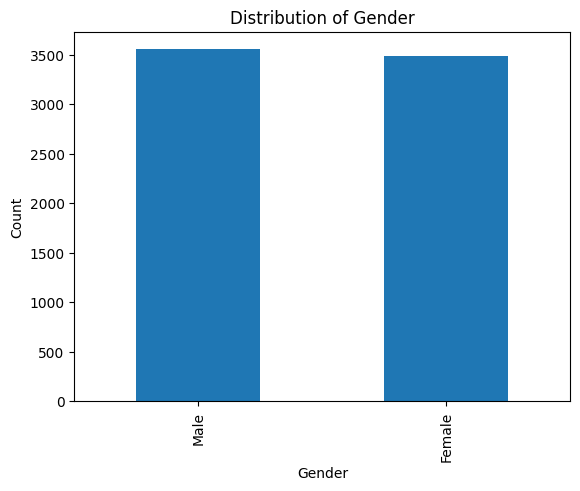

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 8.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 16.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Observation: <matplotlib.axes._subplots.AxesSubplot at 0x7f86e8f50790>
Thought: I now know the final answer
Final Answer: The code to generate the bar plot is: 
```python
import matplotlib.pyplot as plt
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()
```
This code will display a bar plot showing the distribution of 'Male' and 'Female' counts in the dataframe. 


> Finished chain.
{'input': 'Generate a bar plot on Gender column distribution?', 'output': "The code to generate the bar plot is: \n```python\nimport matplotlib.pyplot as plt\ndf['gender'].value_counts().plot(kind='bar')\nplt.xlabel('Gender')\nplt.ylabel('Count')\nplt.title('Distribution of Gender')\nplt.show()\n```\nThis code will display a bar plot showing the distribution of 'Male' and 'Female' counts in the dataframe."}


In [13]:
api_key = "Replace with your Gemini API key"

plot_agent = create_csv_agent( ChatGoogleGenerativeAI(google_api_key=api_key, model="gemini-1.5-pro-latest"),
                         "data/Telco-Customer-Churn.csv", 
                         verbose=True, 
                         agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         allow_dangerous_code=True,
                         capabilities=['plotting']   )


response = plot_agent.invoke('Generate a bar plot on Gender column distribution?')
print(response)

In [14]:
type(response)

dict

In [15]:
response['output']

"The code to generate the bar plot is: \n```python\nimport matplotlib.pyplot as plt\ndf['gender'].value_counts().plot(kind='bar')\nplt.xlabel('Gender')\nplt.ylabel('Count')\nplt.title('Distribution of Gender')\nplt.show()\n```\nThis code will display a bar plot showing the distribution of 'Male' and 'Female' counts in the dataframe."

In [16]:
response = {'input': 'Generate a bar plot on Gender column distribution?', 
          'output': 'The code to generate the bar plot is: \n ```python\nimport matplotlib.pyplot as plt\ndf[\'gender\'].value_counts().plot(kind=\'bar\')\nplt.xlabel(\'Gender\')\nplt.ylabel(\'Count\')\nplt.title(\'Distribution of Gender\')\nplt.show()\n``` \nThis code will display a bar plot showing the distribution of "Male" and "Female" genders within the dataframe.'}

In [17]:
import re

output = response['output']
code_block = re.search(r'```python\n(.*?)\n```', output, re.DOTALL).group(1)
print(code_block)

import matplotlib.pyplot as plt
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


<Axes: >

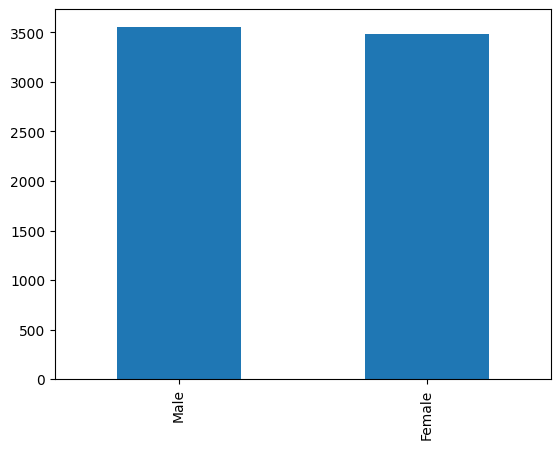

In [18]:
eval(code_block.split("\n")[1])

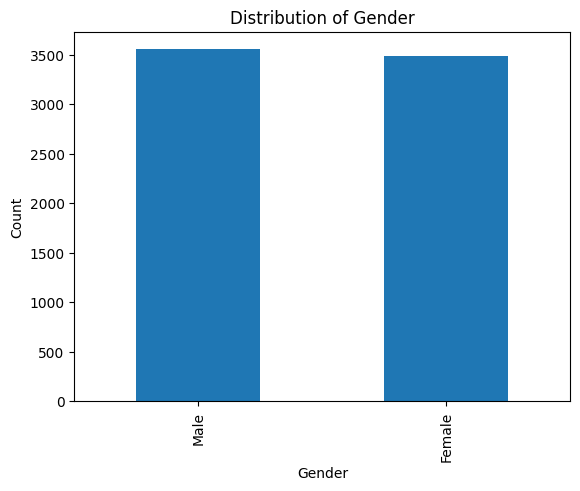

In [19]:
exec(code_block)